<a href="https://colab.research.google.com/github/lakshh670/100_days_of_DeepLearning/blob/main/Weight_initialisation_mistakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# In this notebook we will see what happens when we dont intialise the weights properly. There are 4 common weight initialisation mistakes:
#  1. Assigning 0 to all the weights.
#  2. Assiging non 0 constant value.
#  3. Assigning random too small values.
#  4. Assiging random too large values.
# Let's see these problems one by one

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from matplotlib import pyplot as pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# Data Generation

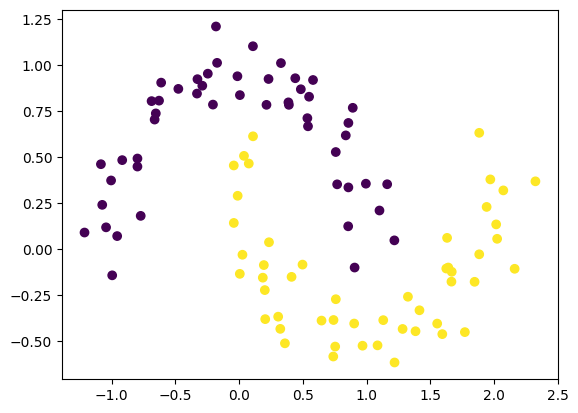

In [4]:
x,y=make_moons(noise=0.12,random_state=42)
plt.scatter(x[:,0],x[:,1],c=y)


# Assigining zero weights

In [5]:
# With relu activation function
model1=Sequential()
model1.add(Dense(2,input_dim=2,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
model1.get_weights()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[array([[ 1.2163674 ,  0.15281451],
        [ 1.0487994 , -0.6147771 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.2342758 ],
        [-0.36568868]], dtype=float32),
 array([0.], dtype=float32)]

In [6]:
initial_weights=model1.get_weights()
initial_weights[0]=np.zeros(initial_weights[0].shape)
initial_weights[1]=np.zeros(initial_weights[1].shape)
initial_weights[2]=np.zeros(initial_weights[2].shape)
initial_weights[3]=np.zeros(initial_weights[3].shape)
model1.set_weights(initial_weights)

In [7]:
model1.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [8]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['Accuracy'])
history1=model1.fit(x,y,validation_split=0.2,epochs=100,verbose=True)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - Accuracy: 0.5242 - loss: 0.6931 - val_Accuracy: 0.4000 - val_loss: 0.6934
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - Accuracy: 0.5750 - loss: 0.6930 - val_Accuracy: 0.4000 - val_loss: 0.6935
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - Accuracy: 0.5398 - loss: 0.6930 - val_Accuracy: 0.4000 - val_loss: 0.6936
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - Accuracy: 0.5164 - loss: 0.6931 - val_Accuracy: 0.4000 - val_loss: 0.6936
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - Accuracy: 0.5281 - loss: 0.6930 - val_Accuracy: 0.4000 - val_loss: 0.6937
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - Accuracy: 0.5281 - loss: 0.6930 - val_Accuracy: 0.4000 - val_loss: 0.6938
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - Accuracy: 0.5359 - loss: 0.6929 - val_Accuracy: 0.4000 - val_loss: 0.6939
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - Accuracy: 0.5398 - loss: 0.6929 - val_Accuracy: 0.4000 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

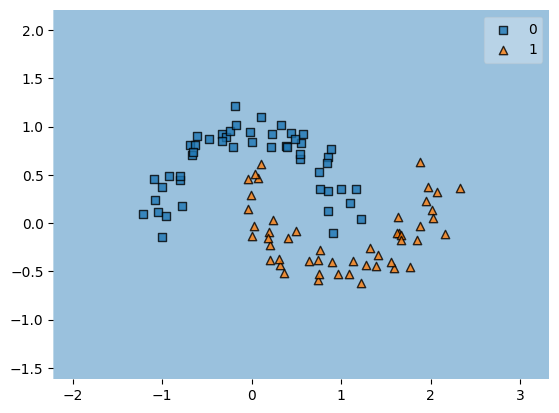

In [9]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y,clf=model1)
# We can clearly see that the model has classified all the points in the blue region
# Similarly, we can try for other activation functions also

# Assiging a constant value

In [10]:
# With relu activation function
# If we intialize all the parameters with same value then we can clearly imagine that even after the weight updation all the weights emerging from a node will have same value i.e. activation of the every node in the next layer will be same i.e. this complex model is reduced to a linear model which won't be able to capture non-linear relationship
model2=Sequential()
model2.add(Dense(2,input_dim=2,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.get_weights()

[array([[ 0.03126109, -0.08489347],
        [ 0.993312  , -0.8935882 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.1779467],
        [ 0.6280483]], dtype=float32),
 array([0.], dtype=float32)]

In [11]:
initial_weights=model2.get_weights()
initial_weights[0]=np.ones(initial_weights[0].shape)*0.5
initial_weights[1]=np.ones(initial_weights[1].shape)*0.5
initial_weights[2]=np.ones(initial_weights[2].shape)*0.5
initial_weights[3]=np.ones(initial_weights[3].shape)*0.5
model2.set_weights(initial_weights)

In [12]:
model2.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [13]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['Accuracy'])
history2=model2.fit(x,y,validation_split=0.2,epochs=100,verbose=True)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - Accuracy: 0.4602 - loss: 0.9195 - val_Accuracy: 0.6000 - val_loss: 0.7960
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - Accuracy: 0.5227 - loss: 0.8338 - val_Accuracy: 0.6000 - val_loss: 0.7931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - Accuracy: 0.5031 - loss: 0.8779 - val_Accuracy: 0.6000 - val_loss: 0.7902
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - Accuracy: 0.4797 - loss: 0.8976 - val_Accuracy: 0.6000 - val_loss: 0.7874
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - Accuracy: 0.4797 - loss: 0.9096 - val_Accuracy: 0.6000 - val_loss: 0.7846
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - Accuracy: 0.5070 - loss: 0.8501 - val_Accuracy: 0.6000 - val_loss: 0.7818
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - Accuracy: 0.4289 - loss: 0.9422 - val_Accuracy: 0.6000 - val_loss: 0.7791
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - Accuracy: 0.4680 - loss: 0.9120 - val_Accuracy: 0.6000 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

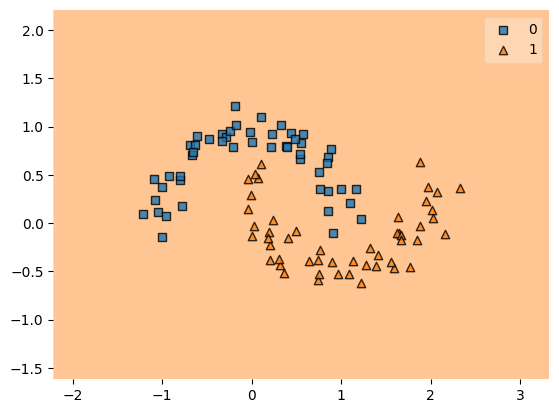

In [14]:
plot_decision_regions(x,y,clf=model2)

# Assigning random small or large values

In [15]:
# Relu doesnt has much probelm with such type of assignment because it only has problem when the activation becomes 0. Sigmoid and tanh as we all know, their derivative become 0 at too small or large values as called as vanishing gradient
# So in these 2 cases we will take sigmoid as the activation function
model3=Sequential()
model3.add(Dense(2,input_dim=2,activation='sigmoid'))
model3.add(Dense(1,activation='sigmoid'))
model3.get_weights()

[array([[ 0.8312293 ,  0.89489233],
        [-0.7929097 ,  0.98128855]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.27182055],
        [-0.6297845 ]], dtype=float32),
 array([0.], dtype=float32)]

In [17]:
# Assigining randomly large values
initial_weights=model3.get_weights()
initial_weights[0]=np.random.randn(initial_weights[0].shape[0],initial_weights[0].shape[1]).astype(np.float32)
initial_weights[1]=np.zeros(initial_weights[1].shape)
initial_weights[2]=np.random.randn(initial_weights[2].shape[0],initial_weights[2].shape[1]).astype(np.float32)
initial_weights[3]=np.zeros(initial_weights[3].shape)
model3.set_weights(initial_weights)

# For small values we need to just multiply these weights by 0.01

In [18]:
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['Accuracy'])
history3=model3.fit(x,y,validation_split=0.2,epochs=100,verbose=True)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - Accuracy: 0.4758 - loss: 0.7789 - val_Accuracy: 0.6000 - val_loss: 0.6725
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - Accuracy: 0.4602 - loss: 0.7937 - val_Accuracy: 0.6000 - val_loss: 0.6714
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - Accuracy: 0.4367 - loss: 0.8113 - val_Accuracy: 0.6000 - val_loss: 0.6704
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - Accuracy: 0.4992 - loss: 0.7493 - val_Accuracy: 0.6000 - val_loss: 0.6694
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - Accuracy: 0.4836 - loss: 0.7664 - val_Accuracy: 0.6000 - val_loss: 0.6684
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - Accuracy: 0.5070 - loss: 0.7415 - val_Accuracy: 0.6000 - val_loss: 0.6674
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - Accuracy: 0.4914 - loss: 0.7540 - val_Accuracy: 0.6000 - val_loss: 0.6665
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - Accuracy: 0.4563 - loss: 0.7863 - val_Accuracy: 0.6000 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


<Axes: >

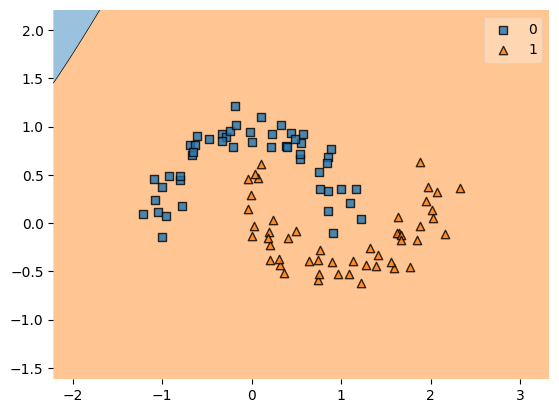

In [19]:
plot_decision_regions(x,y,clf=model3)